In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clintontrump-corpus/clinton_trump.csv


In [2]:
from fastai.imports import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path = Path('../input/clintontrump-corpus')
path.ls()

(#1) [Path('../input/clintontrump-corpus/clinton_trump.csv')]

In [4]:
df = pd.read_csv(path/'clinton_trump.csv')

In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
def extract_name(text): 
    if text.find('Trump') >= 0: return 1
    return 0

In [7]:
def extract_name_str(text): 
    if text.find('Trump') >= 0: return 'trump'
    return 'clinton'

In [8]:
df['label'] = df['doc_id'].map(extract_name).astype('float')
# df['text'] = df['doc_id'].map(extract_name_str)

In [9]:
np.mean(df['label'])

0.7008547008547008

In [10]:
df = df.drop('doc_id', axis=1)

In [11]:
df['text'] = df['text'].map(str.lower)

In [12]:
def drop_metadata(text):
    first_close = text.find('>')
    second_close = text.find('>', first_close +1 )
    return text[second_close+1:]

In [13]:
def drop_intro(text):
    first_trump = text.find('<trump')
    if (first_trump >= 0):
        return text[first_trump:]
    
    first_hilary = text.find('<hilary')
    if (first_hilary >= 0):
        return text[first_hilary:]
    return text

In [14]:
import re 

def drop_alt_speakers(text):
    return re.sub("[\(\<].*?[\)\>]", "", text)

In [15]:
def drop_incomplete_first_sen(text):
    first_stop = text.find('.')
    if (first_stop >= 0):
        return text[first_stop+2:]

In [16]:
# df['text'] = df['text'].map(drop_metadata)
# df['text'] = df['text'].map(drop_intro)
df['text'] = df['text'].map(drop_alt_speakers)
df['text'] = df['text'].str[-1200:]
df['text'] = df['text'].map(drop_incomplete_first_sen)
df['text'] = df['text'].str.replace('<applause>', '')
df['text'] = df['text'].str.replace('<cheering and applause>', '')
df['text'] = df['text'].str.replace('<crosstalk>', '')
df['text'] = df['text'].str.replace('<', '')
df['text'] = df['text'].str.replace('>', '')
df['text'] = df['text'].str.replace('\\', '')
df['text'] = df['text'].str.replace(':', ' :')   
df['text'] = df['text'].str.replace(' --', ',') 
df['text'] = df['text'].str.replace('hillary clinton', 'the candidate')
df['text'] = df['text'].str.replace('hillary', 'the candidate')
df['text'] = df['text'].str.replace('clinton', 'the candidate')
df['text'] = df['text'].str.replace('donald trump', 'the candidate')
df['text'] = df['text'].str.replace('donald', 'the candidate')
df['text'] = df['text'].str.replace('trump', 'the candidate')

In [17]:
df

,text,label
0,"i want you to really understand what that means for you and for all of us. because i prefer for us to be motivated by what we're for, not what we're against. but i also think it's prudent to imagine what could happen if we don't do our part. and when, in the future, somebody asks you, maybe your kids or your grandkids, what did you do when everything was on the line? i want you to be able to say, i voted for a better, fairer, stronger america. let's go out and in these next eight days do everything we can to make it clear, we're going after the kind of future that includes everybody. we...",0.0
1,"and that includes hispanic workers, and that african-american workers. we will end the era of nation-building. and instead work in partnership with our allies to crush and destroy isis. we will keep radical islamic terrorism out of our country. we will promote the values of tolerance, justice and acceptance. we will steadfastly reject bigotry and hatred and oppression in all of its ugly forms. america will be one nation, united in common. we will have a nation the likes of which this world perhaps has never seen before. we will have dreams, and they'll be common dreams. we will have a p...",1.0
2,"you got to go out. we got to vote and we got to win. change. change. so you have one magnificent chance to beat the corrupt system that you're witnessing today, and to deliver justice for every forgotten man and woman and child in this nation. do not let this opportunity slip away. we're fighting for every citizen who believes that government should serve the people, not the donors and not the special interests. and we're fighting, we're fighting to bring us all together as americans. we're a very divided country. people don't realize we are an unbelievably divided country. we're going t...",1.0
3,"and we will save our second amendment, which is under siege going to do big, big, bad numbers on your second amendment folks. and appoint justices to the united state supreme court, who will uphold and defend the constitution of the united states. i can't believe i'm saying this. it started on june 16th, last year, june 16th. it's a long time, thank you, i love you too darling. all together as americans, we're a divided nation, we're a very badly divided nation. we're going to be brought together. just imagine what our country could accomplish by working together as one people, under...",1.0
4,"that's a great way to end actually. i just want to thank you for being here. it's so important that on november 8, you have to get out and vote. if for no other reason, remember this, remember this, strong defense, strong borders, but remember, supreme court justices. we're going to be appoint, and mike will be absolutely right there with me. we'll be picking the best right off that list. we are going to be appointing anywhere from two to five, it could even be. and if you put the wrong people on, you're back to venezuela. this is venezuela. so let me just tell you, if you can, get your fr...",1.0
...,...,...
112,"we are fighting to unlock the potential of every american community and every american family who hope and pray and yearn for a much better future. i am asking you to dream big, i got to dream big. because with your vote, we are just, can you believe this?, six days away. think of that. from the change you've been waiting for your entire life. we're going to work together. we're going to vote. you're going to vote now or you're going to vote by the 8th. but you're going to vote. thank you. i love that guy. he's a tough guy, but he just screamed out, ""you're going to win."" we're going...",1.0
113,"we can fix a rigged system by relying on the people, and just remember this, so important. we are reliant on people that rigged this system in the past. we can't fix it. and we're going to rely on those people again. we can't solve that problem. so we can't solve our problems if we're going to just go back and rely on these politicians. 

In [18]:
df['text'][0]

" i want you to really understand what that means for you and for all of us. because i prefer for us to be motivated by what we're for, not what we're against.  but i also think it's prudent to imagine what could happen if we don't do our part. and when, in the future, somebody asks you, maybe your kids or your grandkids, what did you do when everything was on the line? i want you to be able to say, i voted for a better, fairer, stronger america.  let's go out and in these next eight days do everything we can to make it clear, we're going after the kind of future that includes everybody. we're going to build this economy. new jobs, rising rages, we're going to make college affordable, and help you pay down your student debt. we are going to do what will give you the best chance for your own lives and the lives of our kids and our grandkids. so if we build that future together, we will be able to say we were part of making sure that america's best days are still ahead of us.  and we wil

In [19]:
from sklearn.model_selection import train_test_split

df, eval_df = train_test_split(df, test_size=0.2)
df = df.reset_index(drop=True)
eval_df = eval_df.reset_index(drop=True)

In [20]:
df

,text,label
0,"that's a great way to end actually. i just want to thank you for being here. it's so important that on november 8, you have to get out and vote. if for no other reason, remember this, remember this, strong defense, strong borders, but remember, supreme court justices. we're going to be appoint, and mike will be absolutely right there with me. we'll be picking the best right off that list. we are going to be appointing anywhere from two to five, it could even be. and if you put the wrong people on, you're back to venezuela. this is venezuela. so let me just tell you, if you can, get your fr...",1.0
1,"so i just want to thank all of the folks, great, brave people, and they're representing a lot of other people, a lot, thousands and thousands of people where similar things have happened. and i think i'd like to ask maybe maria to come back up. and we're going to ask her to say a few words. thank you, maria. i present this plaque representing the loved ones of the families who've been killed by illegal aliens, who are here with us today. and with that, we say from the remembrance project and the families and the families who have lost their loved ones and those who have not yet, but unfo...",1.0
2,"we go to alabaman, we had 35,000 people. we go to different places and we get crowds that nobody has ever seen before for what we're doing. and i don't have a guitar. somebody said you get the biggest crowds in the world for a guy with a guitar, which is an interesting, it's an interesting way of looking at it. i'll tell you who said that, a very famous guy, but i better not, i'll get him in trouble. happens to be very liberal, i will really get him in trouble. we're going to make history together. you're going to look back at this election and say this is by far the most important vote t...",1.0
3,"we're going to take care of that. we're going to take care of that situation so quickly and you're going to be so happy and you're going to know you're going to have your company here for a long time, believe me. in this new future we are going to raise your wages. you're going to have competition. people are going to be looking for employees. they're going to be looking. companies, companies are going to be looking for people to work in that company. right now you can't get a job. and all our good jobs are gone. household incomes are over $4,000 less today than they were 16 years ago. th...",1.0
4,"we need to use technology more. we need to get information out. we need to have, you know, people be able to access easily information about government programs, or costs, or whatever it is that's on their minds. so, you know, that's what i'm going to be doing, i'm going to be talking about how we make college tuition free for under $125,000 per family and debt-free for everybody else. i think that, i think that's what people care about. oh! let me think! look, i like a lot of the world leaders. one of my favorites is angela merkel, because i think she's been an extraordinary strong lead...",0.0
...,...,...
88,"six days. six days. i started this in june, june 16th of last year. it seemed like it would take forever. of course, you know, the pundits all said the candidate has no chance, he's got no experience at this. well, every once in a while some of them that knew us, they'd say be careful what you wish for. a couple of them said it, i won't mention their names, but i was complimented. they said be careful. and then one by one, right, one by one by one by one. and then we have some great people. ben carson has been so incredible. so many, chris christie has been great. but we have great supp...",1.0
89,"and i can't do it alone; i need each and every one of you. here's what i'd ask you to do, please join us. go to the candidatethe candidate.com or text join - j-o-i-n - to 47246 to be part of this campaign and we are hiring organizers here in pennsylvania and across the country. and between now and election day, we are going to reg

In [21]:
eval_df['text'][1]

"we'll never ever let what's happened to them happen to them again. we'll establish justice and opportunity and safety in every community in the land. i am asking for the vote of every citizen in this country, african american, hispanic, all americans, all americans who want a better, brighter and stronger future for yourselves and for our country.  i am the change candidate. this is our moment to show the whole world that america is back, bigger and better and stronger than ever before.  i am asking for your vote so i can be your champion in the white house. i will be your champion and i will work hard to be your champion. and i won't be playing golf instead of going to see the people in louisiana who have been devastated by floods.  i'm going to be the champion to every parent who dreams for their children. and to every child who dreams for their future, i say these words to you tonight : i am with you, i will fight for you, and we will win for you, we will win.  together we will mak

In [22]:
from torch.utils.data import DataLoader
import warnings,transformers,logging,torch
from transformers import TrainingArguments,Trainer
from transformers import AutoModelForSequenceClassification,AutoTokenizer


In [23]:
!pip install -q datasets
import datasets
from datasets import load_dataset, Dataset, DatasetDict

In [24]:
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [25]:
model_nm = 'microsoft/deberta-v3-small'

In [26]:
tokz = AutoTokenizer.from_pretrained(model_nm)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

In [27]:
ds = Dataset.from_pandas(df)

In [28]:
def tok_func(x): return tokz(x["text"])

In [29]:
tok_ds = ds.map(tok_func, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [30]:
tok_ds = tok_ds.remove_columns(['text'])

In [31]:
tok_ds

Dataset({
    features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 93
})

In [32]:
dds = tok_ds.train_test_split(0.25, seed=42)
dds

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 69
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 24
    })
})

In [33]:
np.mean(df['label'])

0.7204301075268817

In [34]:
def corr(eval_pred): return {'pearson': np.corrcoef(*eval_pred)[0][1]}

In [35]:
! pip install -q evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [36]:
import evaluate

accuracy = evaluate.load("accuracy")

In [37]:

def acc(eval_pred):
    predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=0)
    return accuracy.compute(predictions=predictions, references=labels)

In [38]:
corr([[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0], [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0]])

{'pearson': 0.6666666666666667}

In [39]:
lr,bs = 8e-5,128
wd,epochs = 0.01,4

In [40]:
def get_trainer(dds):
    args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
        evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
        num_train_epochs=epochs, weight_decay=wd, report_to='none')
    model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)
    return Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],
                   tokenizer=tokz, compute_metrics=acc)

In [41]:
args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=wd, report_to='none')

In [42]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)
trainer = Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],
               tokenizer=tokz, compute_metrics=corr)

pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

In [43]:
trainer.train();

Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.829074,-0.056097
2,No log,0.829074,-0.056097
3,No log,0.829074,-0.056097
4,No log,0.549398,0.582118


In [44]:
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [45]:
eval_ds

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 24
})

In [46]:
preds = trainer.predict(eval_ds).predictions.astype(float)
preds

array([0.15307617, 0.14257812, 0.15966797, 0.15661621, 0.15551758,
       0.15612793, 0.15588379, 0.15930176, 0.13989258, 0.13928223,
       0.13171387, 0.13757324, 0.15405273, 0.14099121, 0.15429688,
       0.13464355, 0.15112305, 0.15478516, 0.13525391, 0.13867188,
       0.13439941, 0.14282227, 0.16052246, 0.14465332])

In [47]:
preds.round()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [48]:
eval_df['label']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     0.0
9     0.0
10    0.0
11    1.0
12    1.0
13    0.0
14    1.0
15    0.0
16    1.0
17    1.0
18    0.0
19    0.0
20    1.0
21    0.0
22    1.0
23    0.0
Name: label, dtype: float64

In [49]:
np.corrcoef(preds, eval_df['label'])

array([[1.        , 0.71498309],
       [0.71498309, 1.        ]])

In [50]:
import matplotlib as plt

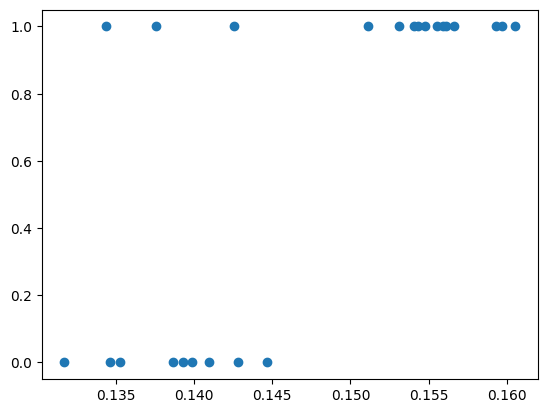

In [52]:
plt.pyplot.scatter(preds, eval_df['label'])